In [55]:
import pandas as pd
import json
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## <center> Exploratory Data Analysis

#### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

***

In [56]:
ultimate_logins = pd.read_json('logins.json')
ultimate_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [57]:
ultimate_logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [58]:
ultimate_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [59]:
ultimate_logins['logins'] = 1
u_logins_15T = ultimate_logins.set_index('login_time')
# add up logins for 15 min interval
u_logins_15T = u_logins_15T.resample('15T').sum()

login_time,1970-03-01 04:30:00,1970-04-04 05:30:00,1970-04-04 01:30:00,1970-04-04 01:15:00,1970-04-01 23:30:00,1970-04-04 05:00:00,1970-04-04 04:45:00,1970-04-04 05:15:00,1970-04-04 01:45:00,1970-03-13 22:15:00
logins,73,66,64,63,60,60,59,59,56,55


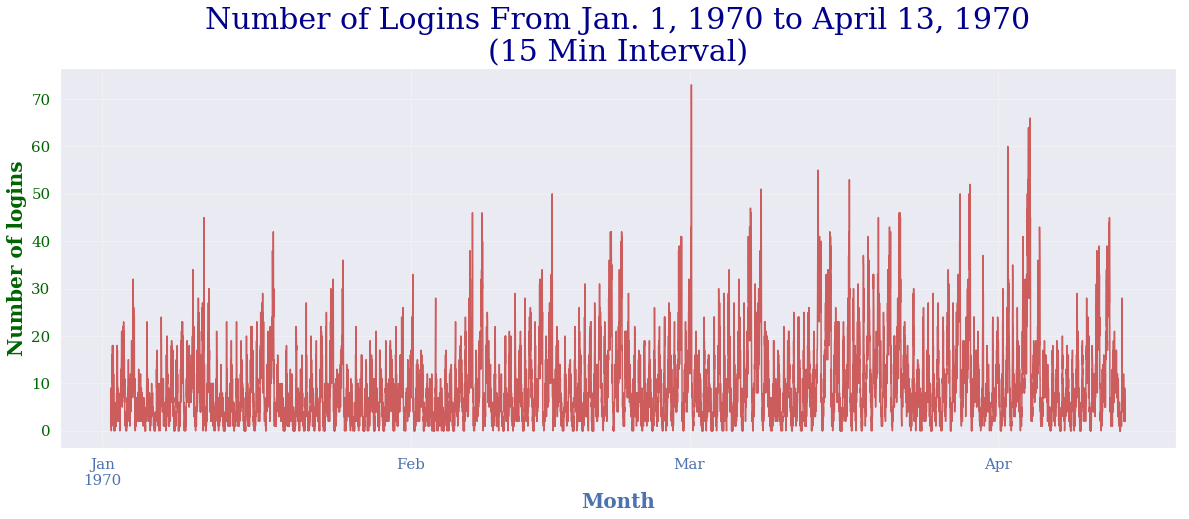

In [60]:
display(u_logins_15T.sort_values(by = 'logins', ascending = False).head(10).T)

_ = u_logins_15T.plot(figsize=(20,7), c = 'indianred', legend = False)
_ = plt.title('Number of Logins From Jan. 1, 1970 to April 13, 1970\n(15 Min Interval)', \
              size = 30, color= 'darkblue', fontname = 'serif')
_ = plt.xlabel('Month', color = 'b', size = 20, fontname = 'serif', fontweight = 'bold')
_ = plt.xticks(fontname = 'serif', size = 15, color = 'b')
_ = plt.ylabel('Number of logins', size = 20, fontname = 'serif', color = 'darkgreen', fontweight = 'bold')
_ = plt.yticks(fontname = 'serif', size = 15, color = 'darkgreen')
_ = plt.grid(alpha = 0.3)


### <center> Most frequent logins occured on March 1st @ 4:30am, and April 4th @ 5:30am, 1970
    
***

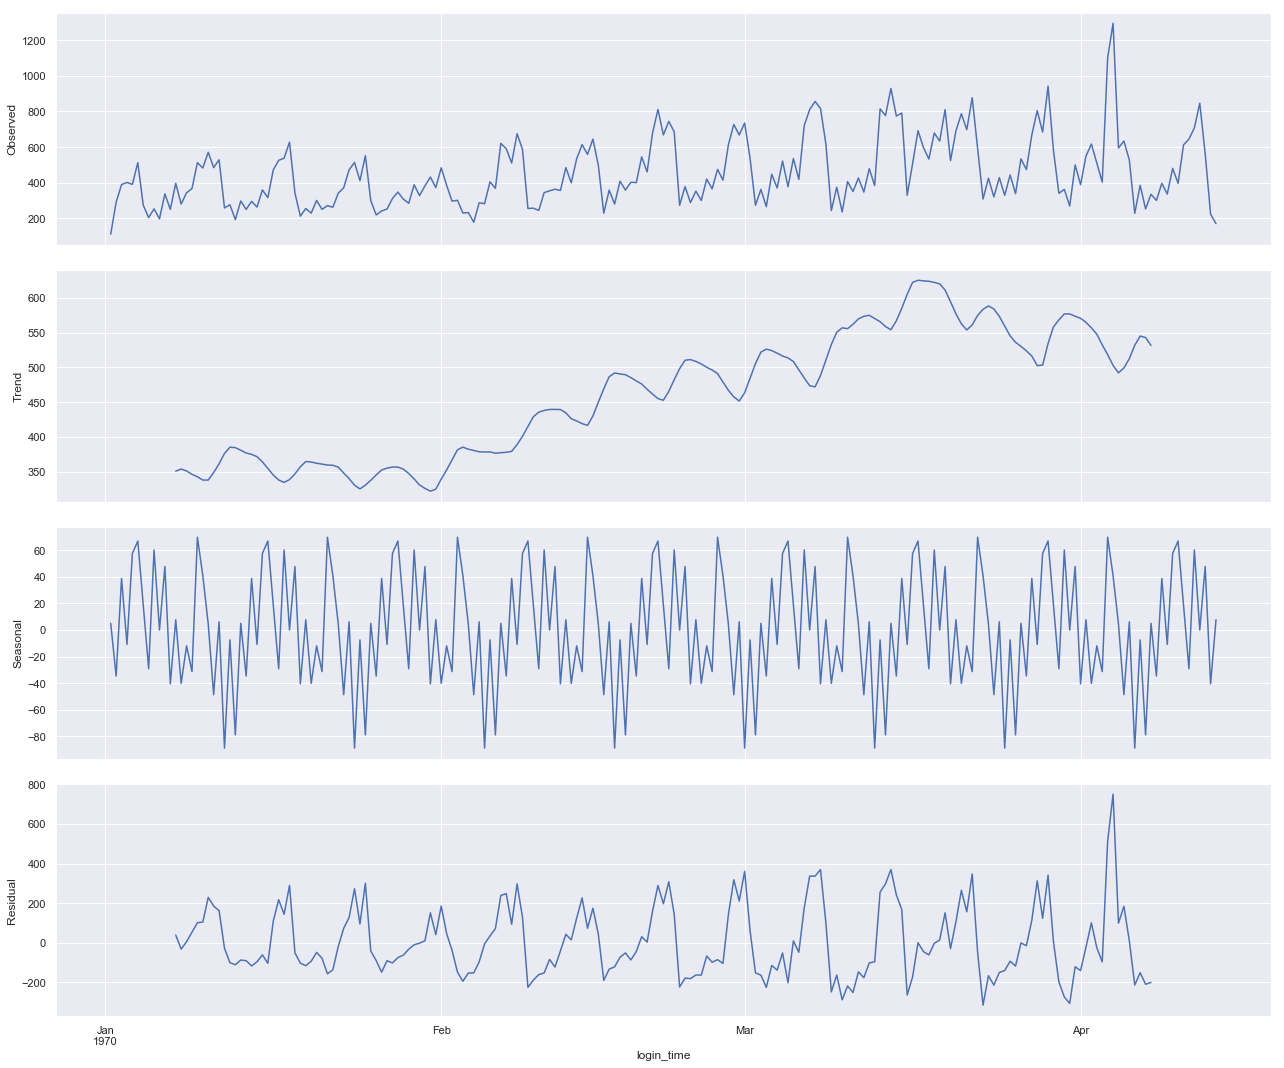

In [61]:
_ = sns.set(rc={'figure.figsize': (18, 15)})
_ = sm.tsa.seasonal_decompose(u_logins_15T.resample('12H').sum()).plot()

### Repeating cyclic patterns are apparent in all levels of decomposition. And although in January the trend is flat, in February, the trend is moving upwards reaching its peak around mid-March and starts to drop thereafter.

***

login_time,1970-04-04 00:00:00,1970-03-14 00:00:00,1970-03-07 00:00:00,1970-03-15 00:00:00,1970-03-29 00:00:00,1970-04-03 00:00:00,1970-03-28 00:00:00,1970-03-21 00:00:00,1970-02-21 00:00:00,1970-03-22 00:00:00
logins,1889,1706,1666,1565,1523,1504,1488,1485,1479,1472


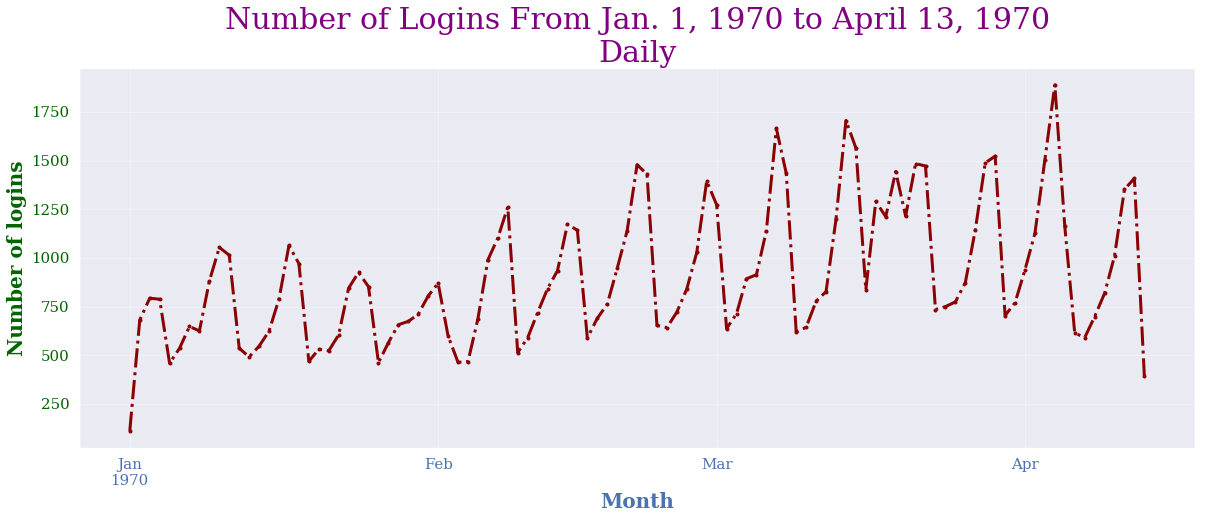

In [62]:
u_logins_1D = ultimate_logins.set_index('login_time')
# add up daily logins
u_logins_1D = u_logins_1D.resample('1D').sum()
# show top ten dates with most frequent logins
display(u_logins_1D.sort_values(by = 'logins', ascending = False).head(10).T)

_ = u_logins_1D.plot(figsize=(20,7), c = 'darkred', legend = False, style = '.-.', linewidth = 3)
_ = plt.title('Number of Logins From Jan. 1, 1970 to April 13, 1970\nDaily', \
              size = 30, color= 'purple', fontname = 'serif')
_ = plt.xlabel('Month', color = 'b', size = 20, fontname = 'serif', fontweight = 'bold')
_ = plt.xticks(fontname = 'serif', size = 15, color = 'b')
_ = plt.ylabel('Number of logins', size = 20, fontname = 'serif', color = 'darkgreen', fontweight = 'bold')
_ = plt.yticks(fontname = 'serif', size = 15, color = 'darkgreen')
_ = plt.grid(alpha = 0.3)

### <center> Most frequent daily logins occured on April 4th, and March 14th, 1970
    
***

login_time,1970-03-22 00:00:00,1970-04-05 00:00:00,1970-03-08 00:00:00,1970-03-15 00:00:00,1970-03-29 00:00:00,1970-02-22 00:00:00,1970-03-01 00:00:00,1970-04-12 00:00:00,1970-02-15 00:00:00,1970-02-08 00:00:00
logins,8955,8095,7398,7338,7285,7035,6554,6491,5915,5572


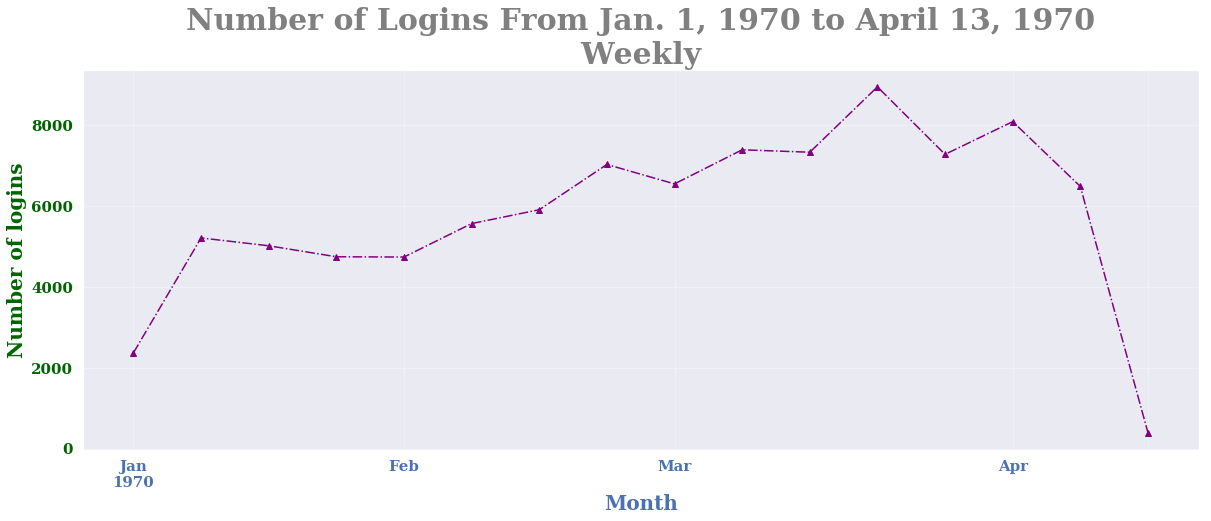

In [63]:
u_logins_1W = ultimate_logins.set_index('login_time')
# add up daily logins
u_logins_1W = u_logins_1W.resample('1W').count()
# show top ten dates with most frequent logins
display(u_logins_1W.sort_values(by = 'logins', ascending = False).head(10).T)

_ = u_logins_1W.plot(figsize=(20,7), c = 'purple', legend = False, style = '^-.')
_ = plt.title('Number of Logins From Jan. 1, 1970 to April 13, 1970\nWeekly', \
              size = 30, color= 'grey', fontname = 'serif', fontweight = 'bold')
_ = plt.xlabel('Month', color = 'b', size = 20, fontname = 'serif', fontweight = 'bold')
_ = plt.xticks(fontname = 'serif', fontweight = 'bold', size = 15, color = 'b')
_ = plt.ylabel('Number of logins', size = 20, fontname = 'serif', color = 'darkgreen', fontweight = 'bold')
_ = plt.yticks(fontname = 'serif', fontweight = 'bold', size = 15, color = 'darkgreen')
_ = plt.grid(alpha = 0.3)

,March,Feb,Jan,April
logins,33723,24673,21239,13507


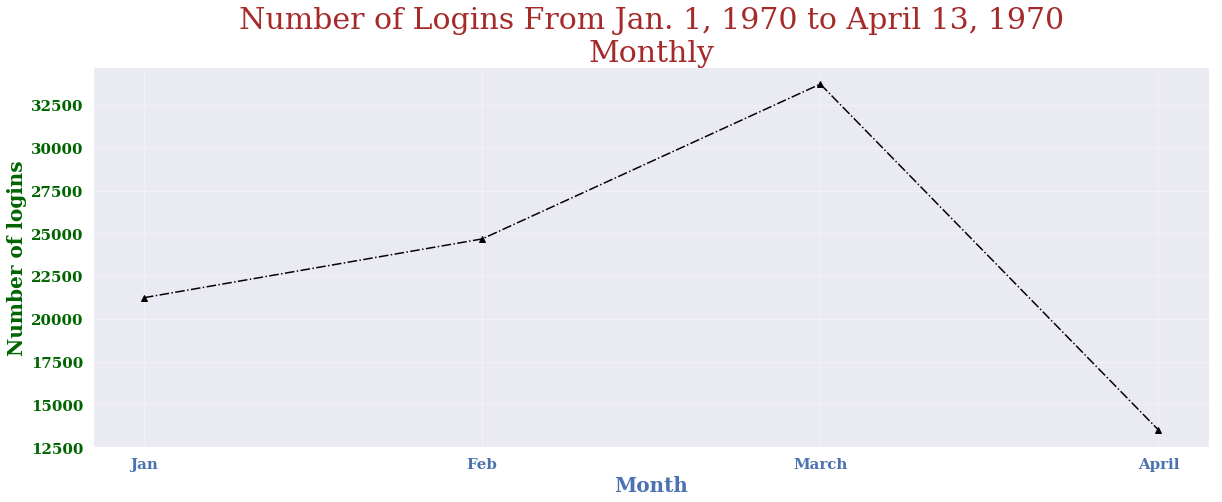

In [64]:
u_logins_1M = ultimate_logins.set_index('login_time')
# add up daily logins
u_logins_1M = u_logins_1D.resample('1M').sum()
u_logins_1M.index = ['Jan', 'Feb', 'March', 'April']
# show top ten dates with most frequent logins
display(u_logins_1M.sort_values(by = 'logins', ascending = False).T)

_ = u_logins_1M.plot(figsize=(20,7), c = 'black', legend = False, style = '^-.')
_ = plt.title('Number of Logins From Jan. 1, 1970 to April 13, 1970\nMonthly', \
              size = 30, color= 'brown', fontname = 'serif')
_ = plt.xlabel('Month', color = 'b', size = 20, fontname = 'serif', fontweight = 'bold')
_ = plt.xticks(list(range(4)),['Jan', 'Feb', 'March', 'April'], fontname = 'serif', fontweight = 'bold', size = 15, color = 'b')
_ = plt.ylabel('Number of logins', size = 20, fontname = 'serif', color = 'darkgreen', fontweight = 'bold')
_ = plt.yticks(fontname = 'serif', fontweight = 'bold', size = 15, color = 'darkgreen')
_ = plt.grid(alpha = 0.3)

### <center> Most frequent monthly logins occured on March, 1970
    
***

In [65]:
log_entries = ultimate_logins.copy()
log_entries['weekday'] = log_entries['login_time'].dt.dayofweek
weekday_logins = log_entries.sort_values(by = 'logins', ascending = False).groupby('weekday').sum().reset_index()
weekday_logins['weekday'] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']

,0,1,2,3,4,5,6
weekday,Mon,Tues,Wed,Thurs,Fri,Sat,Sun
logins,8823,9268,10339,11960,15208,19377,18167


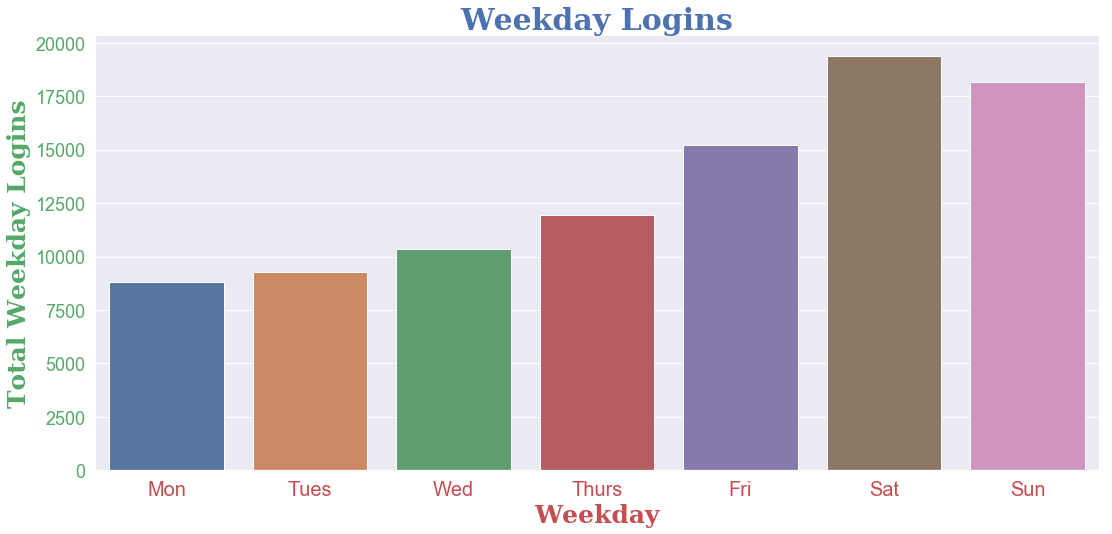

In [66]:
display(weekday_logins.T)
_ = sns.set(rc={'figure.figsize': (18, 8)})
_ = sns.barplot(x = 'weekday', y = 'logins', data = weekday_logins)
_ = plt.title('Weekday Logins', fontname = 'serif', fontweight = 'bold', size = 30, color = 'b')
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('Weekday', fontname = 'serif', fontweight = 'bold', size = 25, color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Total Weekday Logins', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')

In [67]:
log_entries = ultimate_logins.copy()
log_entries['hour'] = log_entries['login_time'].dt.hour
hourly_logins = log_entries.sort_values(by = 'logins', ascending = False).groupby('hour').sum().reset_index()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
logins,5993,6317,5800,4831,5034,2945,1138,815,818,1527,...,3426,3038,2832,2584,2980,3235,4103,5623,6607,6058


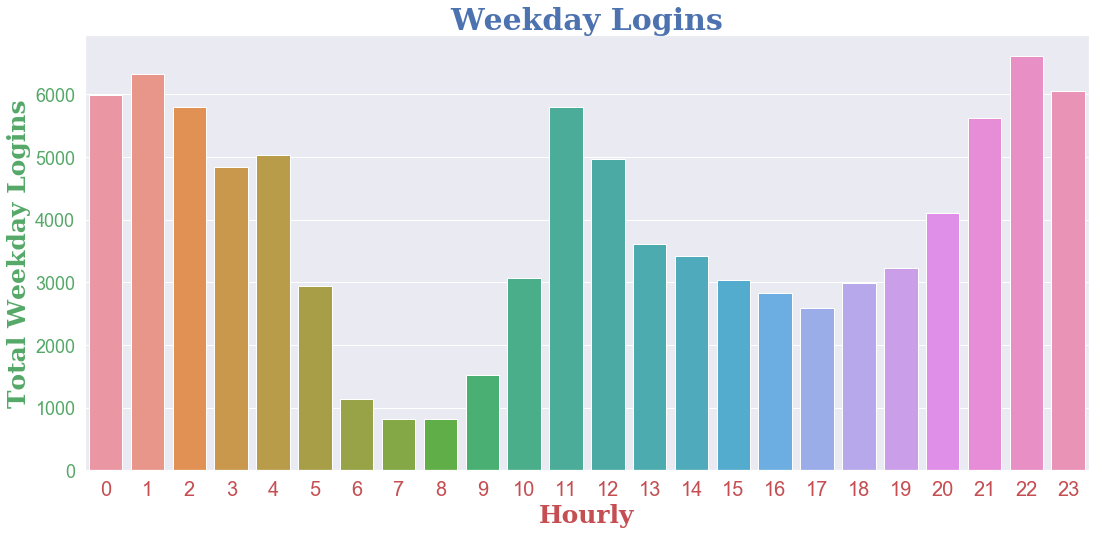

In [68]:
display(hourly_logins.T)
_ = sns.set(rc={'figure.figsize': (18, 8)})
_ = sns.barplot(x = 'hour', y = 'logins', data = hourly_logins)
_ = plt.title('Weekday Logins', fontname = 'serif', fontweight = 'bold', size = 30, color = 'b')
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('Hourly', fontname = 'serif', fontweight = 'bold', size = 25, color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Total Weekday Logins', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')

### Lowest number of logins are between 6am and 9am indicating the rides are mostly  utilized for personal business and less likely for commuting to work.

### Highest number of logins are between 9pm (21:00) and 4am, which clearly implies personal activities considering most logins were on weekends (Friday through Sunday)

***

## <center> Part 2 - Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


#### Solution

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

        Measure of success is when intercity commuters are reasonably served based on
        avaialble rides without causing shortage of rides for clients in each city while
        collecting enough money to maintain the toll bridge.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

    1. Establish demand for intercity commute
    2. Observe and document all current transportation means, cost, and commute time 
    serving intercity commute demand presently and next 10 years 
    3. Survey driver willingness to participate in providing rides between the two cities 
    with and without being reimbursed with the two-way toll.
    4. Estimate the cost of toll reimbursment and how it affects the funds collected to
    maintain the toll bridge
    5. Estimate accident rates as a consequence of change in traffic and how it affects
    intercity commute
    6. Estimate maintenace cost due to traffic change
    7. Design a controlled reimbursement program such as including top 25% of participating
    drivers


b. what statistical test(s) you will conduct to verify the significance of the
observation

    1. t-test for comparing before and after reimbursement program
    2. Chi-squared to evaluate parameter significance
    3. F-statistics to identify the most relevant parameters
    
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

    1. Analyze and evaluate traffic consequences
    2. How much of the rider demand is met
    3. Increased bridge maintenance due to traffic change
    4. Consequences of reduced funds for toll bridge due to reimbursement

## <center> PRT 3 - Predictive Modeling
    
    Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

#### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [246]:
# pd.read.json did not work for this file. Alternatively, using json and convert to DataFrame.
openfile = open('ultimate_data_challenge.json')
jsondata = json.load(openfile)
ultimate_data_challenge = pd.DataFrame(jsondata)
openfile.close()
# display head of the DataFrame
ultimate_data_challenge.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [247]:
ultimate_data_challenge.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [248]:
ultimate_data_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [249]:
ultimate_data_challenge[['signup_date', 'last_trip_date']].describe()

,signup_date,last_trip_date
count,50000,50000
unique,31,182
top,2014-01-18,2014-06-29
freq,2948,2036


,Winterfell,Astapor,King's Landing
city,23336,16534,10130


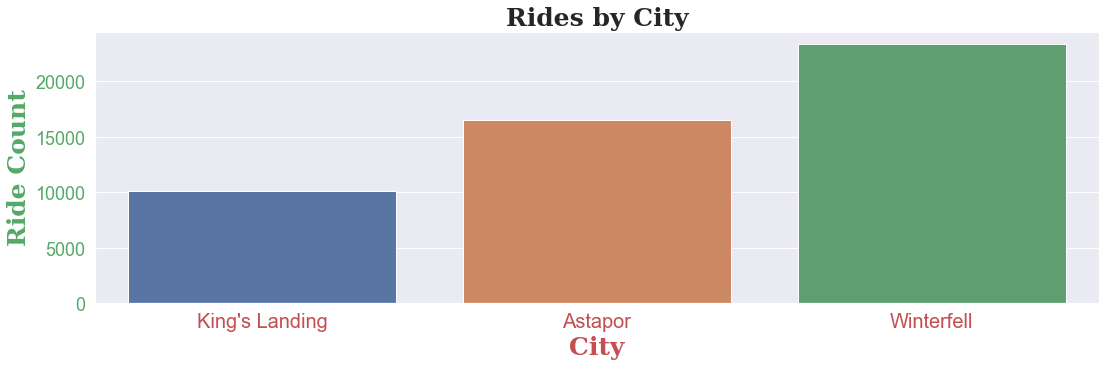

In [250]:
display(pd.DataFrame(ultimate_data_challenge['city'].value_counts()).T)

_ = sns.set(rc={'figure.figsize': (18, 5), 'legend.fontsize': 20})
_ = sns.countplot(x = 'city', data = ultimate_data_challenge)
_ = plt.title('Rides by City', fontname = 'serif', fontweight = 'bold', size = 25)
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('City', fontname = 'serif', fontweight = 'bold', size = 25, color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Ride Count', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')

In [253]:
# Create the target variable
last_day = max(ultimate_data_challenge['last_trip_date'])
days = pd.date_range(end=last_day, periods=30, freq='D')
ultimate_data_challenge['user_retention'] = ultimate_data_challenge['last_trip_date'].map(lambda x:'active' if x in days else 'inactive')
# Calculate percentage of retained users
percent = len(ultimate_data_challenge[ultimate_data_challenge.user_retention == 'active']) / len(ultimate_data_challenge)
print('\nObserved retained users is: %.2f%s\n' %(percent*100, '%'))


Observed retained users is: 36.62%



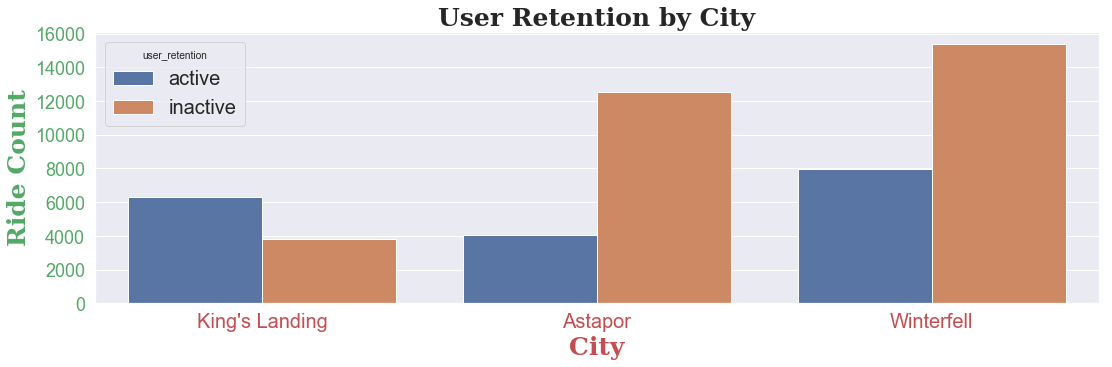

In [254]:
_ = sns.countplot(x='city', hue='user_retention', data = ultimate_data_challenge)
_ = plt.title('User Retention by City', \
              fontname = 'serif', fontweight = 'bold', size = 25)
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('City', fontname = 'serif', fontweight = 'bold', size = 25, color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Ride Count', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')

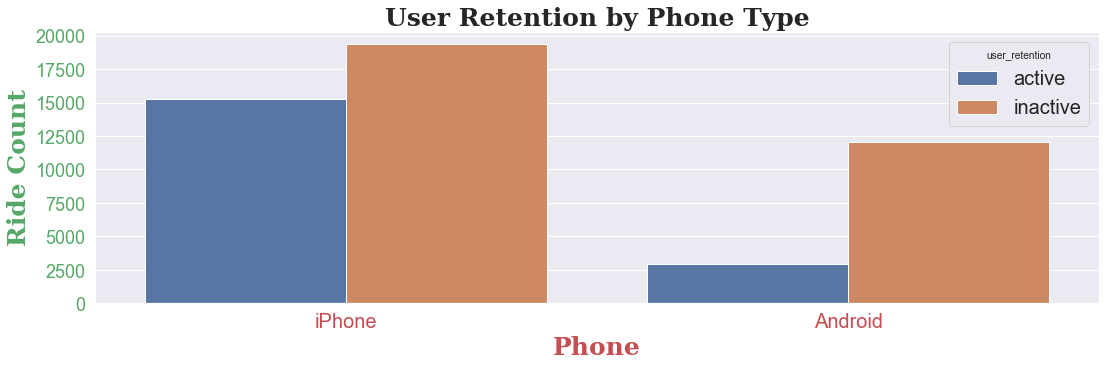

In [255]:
_ = sns.countplot(x='phone', hue='user_retention', data = ultimate_data_challenge)
_ = plt.title('User Retention by Phone Type', \
             fontname = 'serif', fontweight = 'bold', size = 25)
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('Phone', fontname = 'serif', fontweight = 'bold', size = 25, color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Ride Count', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')

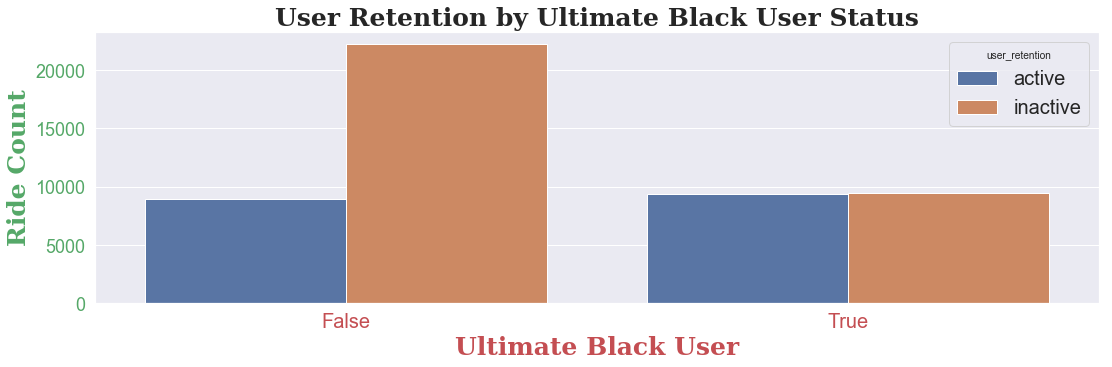

In [256]:
_ = sns.countplot(x='ultimate_black_user', hue='user_retention',\
                  data = ultimate_data_challenge)
_ = plt.title('User Retention by Ultimate Black User Status', \
              fontname = 'serif', fontweight = 'bold', size = 25)
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('Ultimate Black User', fontname = 'serif', fontweight = 'bold', size = 25, color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Ride Count', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')

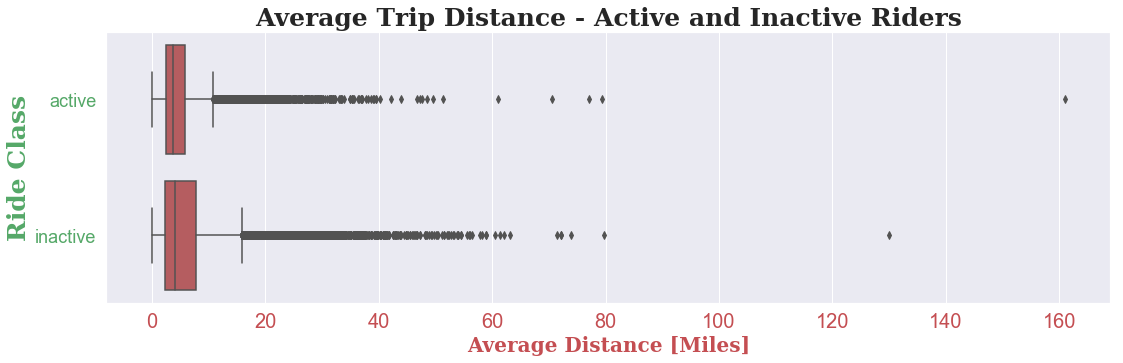

In [257]:
_ = plt.title('Average Trip Distance - Active and Inactive Riders', \
              fontname = 'serif', fontweight = 'bold', size = 25)

_ = sns.boxplot(x='avg_dist', y='user_retention', data = ultimate_data_challenge, color = 'r')
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('Average Distance [Miles]', fontname = 'serif', fontweight = 'bold', \
               size = 20, color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Ride Class', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')


#### Although the outliers maybe very well be valid entries for purpose of analysis the data can be truncated to average distance of 40 mile per trip, since most rides are under 40 miles for both active and inactive users.

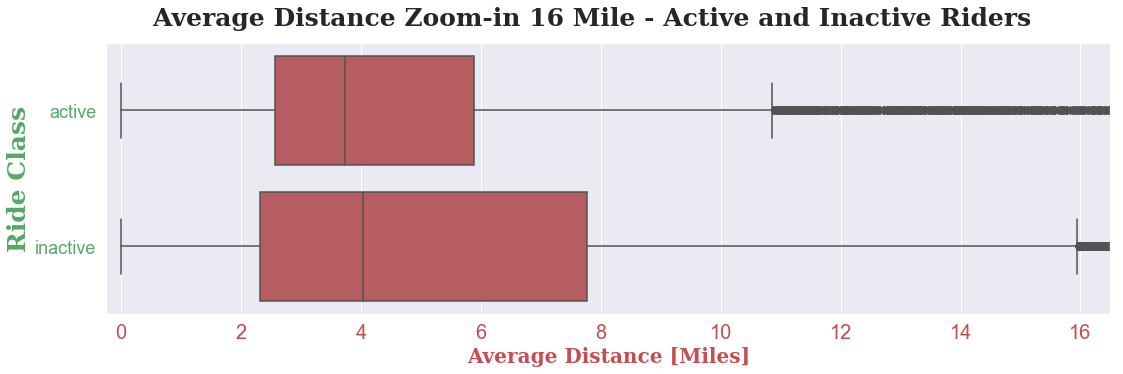

In [259]:
_ = plt.suptitle('Average Distance Zoom-in 16 Mile - Active and Inactive Riders\n ', \
                fontname = 'serif', fontweight = 'bold', size = 25)
_ = sns.boxplot(x='avg_dist', y='user_retention', data = ultimate_data_challenge, color = 'r')
# zooming in to average distance under 20 miles
_ = plt.xlim(-0.25, 16.5);
_ = plt.xticks(size = 20, color = 'r')
_ = plt.xlabel('Average Distance [Miles]', fontname = 'serif', fontweight = 'bold', size = 20, \
               color = 'r')
_ = plt.yticks(size = 18, color = 'g')
_ = plt.ylabel('Ride Class', fontname = 'serif', fontweight = 'bold', size = 25, color = 'g')

#### Active users mostly ride 3 to 6 miles while inactive users have a wider range between 2 and 8 miles. Overall, the inactive riders appear to be requiring longer distances that might infer elders or visitors who may not be able or familiar to navigate the city on their own.
***

***
#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [264]:
ultimate_data = ultimate_data_challenge[ultimate_data_challenge.avg_dist <= 40]

In [265]:
ultimate_data = pd.get_dummies(ultimate_data, drop_first=False)
ultimate_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,...,signup_date_2014-01-24,signup_date_2014-01-25,signup_date_2014-01-26,signup_date_2014-01-27,signup_date_2014-01-28,signup_date_2014-01-29,signup_date_2014-01-30,signup_date_2014-01-31,user_retention_active,user_retention_inactive
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,...,0,1,0,0,0,0,0,0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [267]:
ultimate_data.fillna(0, inplace = True)

In [269]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49887 entries, 0 to 49999
Columns: 228 entries, avg_dist to user_retention_inactive
dtypes: bool(1), float64(6), int64(1), uint8(220)
memory usage: 13.6 MB


#### To predict user rentention, Logistic Regression Model can be useful setting Target  = 'user_retention_active'. Additionally a more generic model like Random Forest can be used to utilize ensamble of models to find important features in determining rider retension. 

***
#### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

#### Based on some inital analysis it appear rider retention by City  needs a bit more research as to destination of the riders and what differentiates active and inactive riders in different cities. Also, iphone users are dominating the active user group. This may be related to income level or effective marketing apps. It might be worthwhile to look into that. Finally, The Ultimate Black User have compareable active and inactive riders, which are clearly less frequent than active users who took Ultimate Black. This again will worthwhile to investigate as to why in order to find how to improve the program or design new offers.